**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
import sklearn.manifold
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook
import seaborn as sns

**Read Data**

In [ ]:
datafile = "/content/forestfires.csv"
df=pd.read_csv(datafile)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
object_columns=df.select_dtypes(['object']).columns
df[object_columns]=df[object_columns].apply(lambda x: x.astype('category'))
cat_columns=df.select_dtypes(['category']).columns
df[cat_columns]=df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
df['area_log']= np.log(df.area +1)
df['area_bins'] = pd.qcut(df['area_log'],2, labels=[0,1])
df.drop(['area','area_log'],axis=1,inplace=True)
y=df.pop('area_bins')
X=df
RS=123
time_start = time.time()
fashion_tsne_2d = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 27.752242


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 265.156219
[t-SNE] KL divergence after 500 iterations: 0.169787
t-SNE Time elapsed: 1.7797503471374512 seconds


In [ ]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [ ]:
y.unique()

[0, 1]
Categories (2, int64): [0 < 1]

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [ ]:
# Utility function to visualize the outputs of t-SNE
def fashion_scatter_2d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
#     plt.show()

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 864x432 with 1 Axes>,
 [Text(-0.41490555, 2.052089, '0'), Text(0.021182701, 2.3952131, '1')])

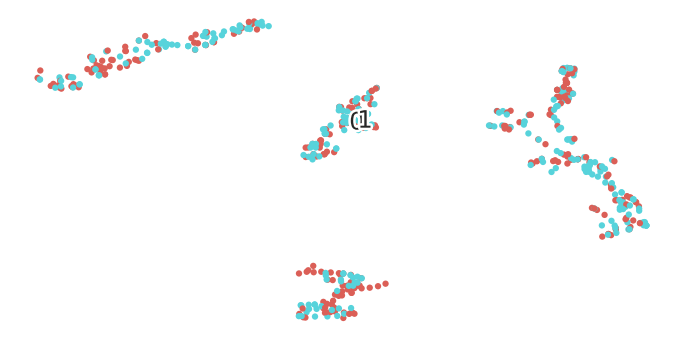

In [ ]:
%matplotlib inline
fashion_scatter_2d(fashion_tsne_2d, y)

In [ ]:
RS=123
from sklearn.manifold import TSNE
import time
time_start = time.time()
fashion_tsne_3d = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time : {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.003s...
[t-SNE] Computed neighbors for 517 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 27.752242
[t-SNE] KL divergence after 250 iterations with early exaggeration: 357.200317
[t-SNE] KL divergence after 500 iterations: 2.502121
t-SNE Time : 7.750007629394531 seconds


In [ ]:
def fashion_scatter_3d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot(111, projection='3d')
    sc = ax.scatter(x[:,0], x[:,1],x[:,2], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext , ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext,ztext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

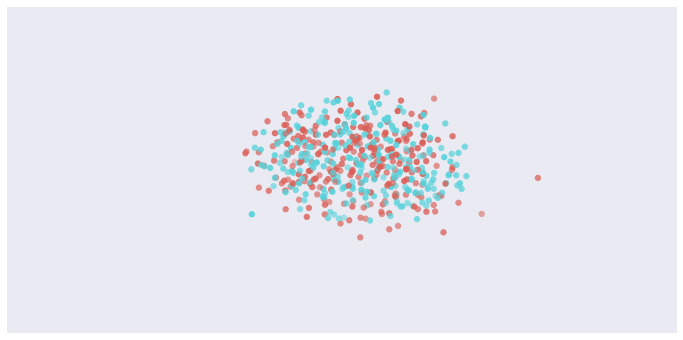

(<Figure size 864x432 with 1 Axes>,
 [Text(-2.1810102, -0.25964755, '0'), Text(1.1155071, -1.162153, '1')])

In [ ]:
%matplotlib inline
fashion_scatter_3d(fashion_tsne_3d, y)

**ANIMATION - T-SNE**

In [ ]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
tsne = TSNE(n_components=3,perplexity=40)
tsne_result = tsne.fit_transform(X)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


**Projecting in 3D space**

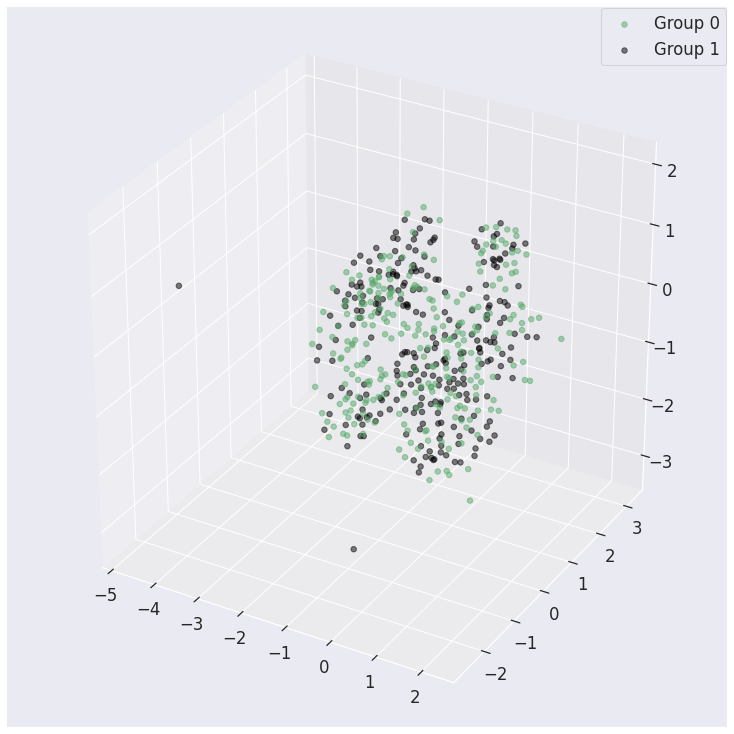

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)
colors = 'g', 'black'
labels = 'Group 0', 'Group 1'
for i, c, label in zip(range(len(labels)), colors, labels):
    ax.scatter(tsne_result_scaled[y==i, 0], tsne_result_scaled[y==i, 1], tsne_result_scaled[y==i, 2], s=30, c=c, label=label, alpha=0.5)
fig.legend()

In [ ]:
def rotate(angle):
     ax.view_init(azim=angle)

angle = 5
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('tsne1.gif', writer=animation.PillowWriter(fps=10))

**T-SNE 3D animation**

In [ ]:
plt.rcParams['animation.html'] = 'html5'
ani